In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **Fast Fourier Transform (FFT) + k-Nearest Neighbors (kNN)**

## Each observation in the dataset has a target variable and 6 time series, each of which is 15 time steps long.  The target variable has 6 classes.

## The below function loads the data from the file, applies fourier transform on each time series, extracts first k terms from the transform and then inserts both the real and imaginary parts of these terms into a table, such that the terms for a particular target variable are in the same row. So, effectively now, each target variable has 6 * 2 * k parameters.

In [0]:
file = open('lp5.data', 'r')
lines = file.readlines()

def load_fft(k):

  if(k>15): 
    k = 15

  df_cols = []
 
  for i in range(6):
    prefix = chr(65 + i)

    if k <15:
      for j in range(k*2):
        df_cols.append(prefix + str(j+1))

    else:
      for j in range(15):
       df_cols.append(prefix + str(j+1))      

  df_cols.append("Target")
  target = None
  df_row = []
  df_rows = []
  l = [[],[],[],[],[],[]]

  for line in lines:
    tokens = line.split()
    if(len(tokens) == 0):
      if l[0]:
        for i in range(6):
          if k < 15:
            fourier = np.fft.fft(l[i])[:k]
            df_row.extend(fourier.real)
            df_row.extend(fourier.imag)
          else:
            df_row.extend(l[i])  
          
        df_row.append(target)  
        df_rows.append(df_row)
        df_row = []
        l = [[],[],[],[],[],[]]
      continue

    if(len(tokens) == 1):
      target = tokens[0]

    else:
      for i in range(6):
        l[i].append(int(tokens[i]))

  df = pd.DataFrame(data = df_rows, columns = df_cols)
  return df

## The function below applies a PCA transform on the dataset and plots the variance ratio plot.

In [0]:
from sklearn.decomposition import PCA

def plot_pca(df):
  pca = PCA().fit(df[df.columns.difference(['Target'])])
  plt.plot(np.arange(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), 'bo')
  plt.xlabel('number of components')
  plt.ylabel('cumulative explained variance')
  plt.show()  

## The function below takes num_cols (the no. of terms to reduce the dataset to) as input from the user and applies the PCA transform accordingly.

In [0]:
def pca_transform(df):
  num_cols = int(input("Observe the above PCA plot and choose no. of dimensions to reduce to: "))
  #num_cols = 5
  pca = PCA(n_components=num_cols)
  df_pca = pca.fit_transform(df[df.columns.difference(['Target'])])
  df_pca = pd.DataFrame(data = df_pca)
  df_pca['Target'] = df['Target']
  return df_pca

## The function below performs a train-test split (3:1 ratio) of the PCA transformed data, applies kNN, and then calculates the confusion matrix and the accuracy.

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def get_accuracy(df_pca, k):

  X_train, X_test, y_train, y_test = train_test_split(df_pca[df_pca.columns.difference(['Target'])], df_pca['Target'], random_state=1)
  knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  print("Confusion Matrix for " + str(k) + " terms is: ")
  con_mat = confusion_matrix(y_test, y_pred)
  print(con_mat)

  accuracy = accuracy_score(y_test, y_pred) * 100
  print("Accuracy for " + str(k) + " terms is: ", accuracy )
  print()
  return accuracy 

## The function below uses all the above defined functions to calculate the accuracies of classification for different no. of terms of the fourier transform. It also calculates the accuracy when the data is used directly without fourier transform. It plots the resulting accuracies on a graph.

In [0]:
def plot_accuracies():

  accuracies = []

  for i in range(1,9):
    df = load_fft(2*i)
    if(i != 8):
      print("**************** Evaluating for " + str(2*i) + " terms*****************")
    else:
      print("**************** Evaluating without FFT*****************")  

    print()
    plot_pca(df)
    df_pca = pca_transform(df)
    accuracy = get_accuracy(df_pca, 2*i)
    accuracies.append(accuracy)

  accuracies = np.array(accuracies)

  print()
  print()
  print("****************Accuracy Plot*****************")
  plt.plot([2*i for i in range(1,8)], accuracies[:-1])
  plt.plot([2*i for i in range(1,8)], [accuracies[-1]]*7)
  plt.title('Accuracy vs. No. of Terms')

## Observe all the PCA variance ratio plots and input the appropriate no. of dimensions to reduce the data to. Finally, observe the resulting accuracy plot at the end. The blue line represents the accuracies with fourier transform, and the orange line represents accuracies without the transform.

**************** Evaluating for 2 terms*****************



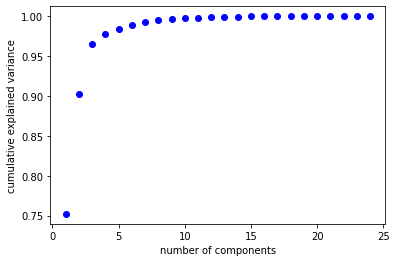

Observe the above PCA plot and choose no. of dimensions to reduce to: 3
Confusion Matrix for 2 terms is: 
[[ 3  0  1  0  0]
 [ 2  3  0  0  0]
 [ 1  0  6  2  4]
 [ 0  0  6  0  2]
 [ 0  0  0  1 10]]
Accuracy for 2 terms is:  53.65853658536586

**************** Evaluating for 4 terms*****************



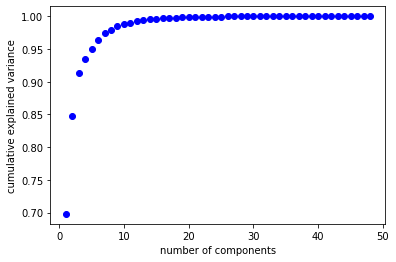

Observe the above PCA plot and choose no. of dimensions to reduce to: 7
Confusion Matrix for 4 terms is: 
[[ 3  0  1  0  0]
 [ 2  3  0  0  0]
 [ 1  0  4  2  6]
 [ 0  0  5  1  2]
 [ 0  0  0  0 11]]
Accuracy for 4 terms is:  53.65853658536586

**************** Evaluating for 6 terms*****************



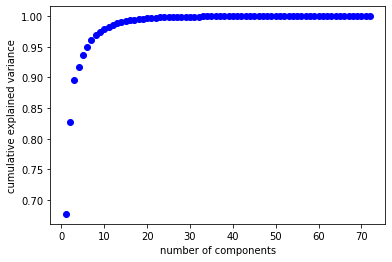

Observe the above PCA plot and choose no. of dimensions to reduce to: 7
Confusion Matrix for 6 terms is: 
[[ 3  0  1  0  0]
 [ 2  3  0  0  0]
 [ 1  0  6  1  5]
 [ 0  0  6  0  2]
 [ 0  0  0  0 11]]
Accuracy for 6 terms is:  56.09756097560976

**************** Evaluating for 8 terms*****************



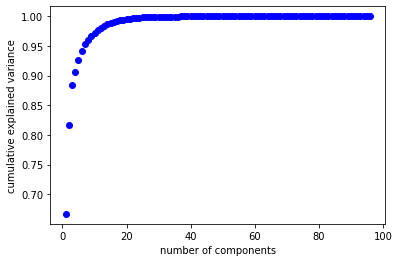

Observe the above PCA plot and choose no. of dimensions to reduce to: 7
Confusion Matrix for 8 terms is: 
[[ 4  0  0  0  0]
 [ 2  3  0  0  0]
 [ 1  0  6  1  5]
 [ 0  0  5  1  2]
 [ 0  0  0  0 11]]
Accuracy for 8 terms is:  60.97560975609756

**************** Evaluating for 10 terms*****************



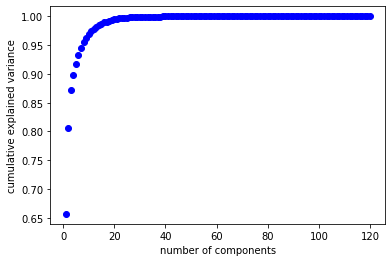

Observe the above PCA plot and choose no. of dimensions to reduce to: 7
Confusion Matrix for 10 terms is: 
[[ 4  0  0  0  0]
 [ 2  3  0  0  0]
 [ 1  0  6  2  4]
 [ 0  0  4  2  2]
 [ 0  0  0  0 11]]
Accuracy for 10 terms is:  63.41463414634146

**************** Evaluating for 12 terms*****************



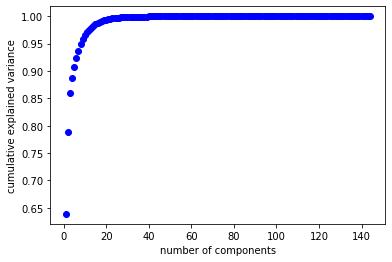

Observe the above PCA plot and choose no. of dimensions to reduce to: 7
Confusion Matrix for 12 terms is: 
[[ 4  0  0  0  0]
 [ 2  3  0  0  0]
 [ 1  0  7  1  4]
 [ 0  0  5  2  1]
 [ 0  0  0  0 11]]
Accuracy for 12 terms is:  65.85365853658537

**************** Evaluating for 14 terms*****************



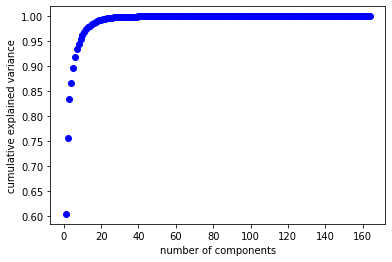

Observe the above PCA plot and choose no. of dimensions to reduce to: 7
Confusion Matrix for 14 terms is: 
[[ 4  0  0  0  0]
 [ 2  3  0  0  0]
 [ 1  0  6  2  4]
 [ 0  0  4  3  1]
 [ 0  0  0  1 10]]
Accuracy for 14 terms is:  63.41463414634146

**************** Evaluating without FFT*****************



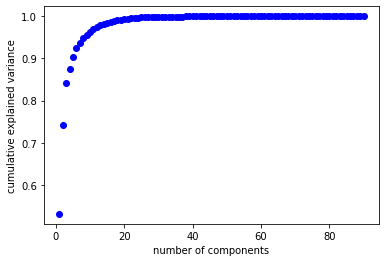

Observe the above PCA plot and choose no. of dimensions to reduce to: 6
Confusion Matrix for 16 terms is: 
[[ 4  0  0  0  0]
 [ 3  2  0  0  0]
 [ 1  0  7  1  4]
 [ 0  0  5  2  1]
 [ 0  0  0  0 11]]
Accuracy for 16 terms is:  63.41463414634146



****************Accuracy Plot*****************


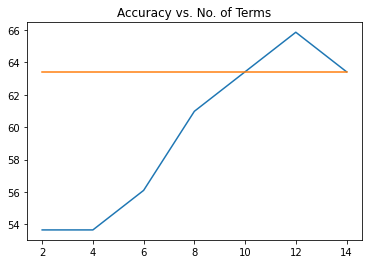

In [16]:
plot_accuracies()

# **THE END**